# Support Vector Machines

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [2]:
X = np.array([[ 0.46613554,  0.92048757],
       [-0.92129195,  0.06723639],
       [-0.15836636,  0.00430243],
       [-0.24055905, -0.87032292],
       [ 0.06245105, -0.53698416],
       [-0.2265037 , -0.43835751],
       [-0.00480479, -0.17372081],
       [-0.1525277 , -0.34399658],
       [-0.27360329,  0.35339202],
       [-0.77464508, -0.48715511],
       [-0.58724291,  0.74419972],
       [-0.97596949, -0.72172963],
       [ 0.42376225, -0.72655597],
       [ 0.96383922, -0.23371331],
       [ 0.16264643, -0.46949742],
       [-0.74294705, -0.42576417],
       [ 0.05089437, -0.20522071],
       [-0.19442744,  0.09617478],
       [-0.97102743,  0.79663992],
       [ 0.0596995 , -0.70129219],
       [-0.83934851, -0.95616033],
       [-0.38249705,  0.4973605 ],
       [ 0.3474666 ,  0.70664397],
       [ 0.35871444,  0.88679345],
       [-0.05914582,  0.23124686],
       [-0.52156643,  0.32986941],
       [-0.53579646,  0.67530208],
       [ 0.13683914, -0.96158184],
       [ 0.65904541, -0.12015303],
       [-0.69078363,  0.5615536 ],
       [ 0.47738323, -0.70919275],
       [ 0.93069669,  0.44019132],
       [ 0.19750088, -0.68869404],
       [-0.75048675, -0.18170522],
       [-0.45288395, -0.25894991],
       [-0.74644547,  0.87781953],
       [ 0.14620452,  0.56864508],
       [ 0.25719272, -0.58405476],
       [ 0.87149524,  0.01384224],
       [-0.71473576,  0.31568314],
       [-0.252637  , -0.67418371],
       [ 0.24718308,  0.95191416],
       [-0.38149953, -0.64066291],
       [-0.23112698,  0.04678807],
       [ 0.72631766,  0.7390158 ],
       [-0.91748062, -0.15131021],
       [ 0.74957917,  0.66966866],
       [ 0.76771849,  0.06662777],
       [-0.04233756, -0.91320835],
       [ 0.63840333,  0.06277738],
       [-0.78887281, -0.90311183],
       [-0.73099834, -0.69587363],
       [-0.50947652, -0.99144951],
       [ 0.14294609,  0.5474932 ],
       [ 0.4367906 ,  0.31953258],
       [-0.13970851,  0.81817884],
       [ 0.6440873 ,  0.79118775],
       [ 0.41714043, -0.66672029],
       [ 0.59283022, -0.71836746],
       [ 0.55379696,  0.98846202],
       [-0.91819517,  0.34203895],
       [ 0.02020188,  0.83696694],
       [ 0.6182918 ,  0.04254014],
       [-0.09354765, -0.30050483],
       [-0.08489545,  0.06431463],
       [-0.11886358, -0.68738895],
       [ 0.44428375,  0.18273761],
       [ 0.26486362, -0.98398013],
       [ 0.13222452,  0.91495035],
       [-0.11101656,  0.00541343],
       [-0.07696178, -0.92720555],
       [ 0.22602214,  0.56040092],
       [ 0.74227542,  0.32930104],
       [ 0.43524657,  0.35332933],
       [-0.89277607, -0.59996171],
       [-0.94836212,  0.78777302],
       [ 0.1783319 , -0.2142071 ],
       [-0.07832238, -0.25046584],
       [ 0.17611799, -0.96927832],
       [-0.95938454, -0.26504646],
       [ 0.58666766, -0.94620881],
       [-0.77336565,  0.46735057],
       [-0.94414054,  0.39044333],
       [ 0.61524645,  0.15907662],
       [-0.09855302,  0.9816656 ],
       [ 0.53937097,  0.34487634]])

In [3]:
y = ["red" if x + y > 0.3 else "green"  for [x,y] in X]


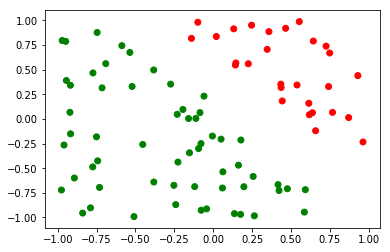

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)

# Exercise

- import the support vector machine classifier from scikit-learn (the SVC class) and train a classifier for the examples above using a linear kernel;
- read the documentation to find out how to obtain the support vectors and the associated (dual) weights; use this information to analyze the learnt model: 
    - how many support vectors have been learnt? 
    - are them in the position you would have expected [[1](#note1)]? 
    - is there any margin error?
    - is there any classification error (check it using the classifier predictions)?
- learn a new SVC model using custom C values:
    - how the answers to the questions above change when you use a very high C value (e.g., 1000)?
    - how the answers to the questions above change when you use a very low C value (e.g., 0.3)?
- learn a new SVC model using a rbf kernel:
    - is the new kernel able to capture the linear model?
    - are you surprised by the above answer? why you are (not) surprised?
    
<a name="note1">[1]</a> If you make two plots one after the other (in the same cell), the plots will be merged into a single one. You may want to use this feature to plot the support vectors on top of the scatter plot for the dataset.

In [21]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

17 support vectors have been learnt
[[-1.         -1.         -1.         -1.         -1.         -1.
  -0.91739157 -1.          1.          1.          1.          1.
   0.30378027  0.6136113   1.          1.          1.        ]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]


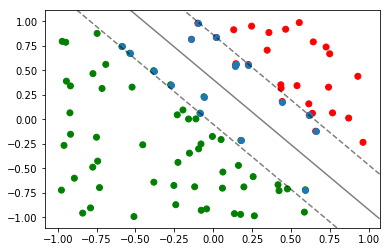

In [32]:
from sklearn.preprocessing import StandardScaler
target = [1 if c=="red" else 0 for c in y]
clf = SVC(kernel='linear').fit(X, target)
print(str(len(clf.support_vectors_)) + " support vectors have been learnt")
#print(clf.dual_coef_)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1])
plot_svc_decision_function(clf);
print(clf.predict(clf.support_vectors_))

- yes, the support vectors are in the positions i would have expected
- there are several margin errors but no classification errors

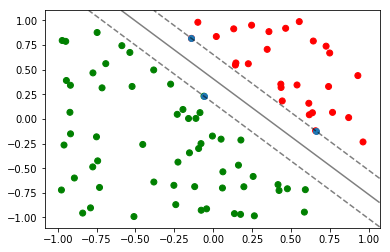

In [33]:
clf = SVC(kernel='linear', C=1000).fit(X, target)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1])
plot_svc_decision_function(clf);

- increasing the C parameter the margin hardens: the number of support vectors decreases and there are no more margin errors

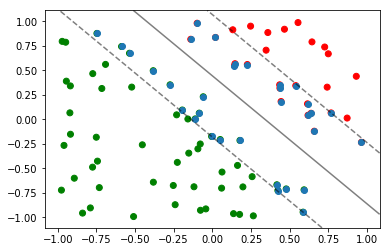

In [34]:
clf = SVC(kernel='linear', C=0.3).fit(X, target)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1])
plot_svc_decision_function(clf);

- decreasing the C parameter the margin softens: more margin errors are allowed so more support vectors are taken into consideration

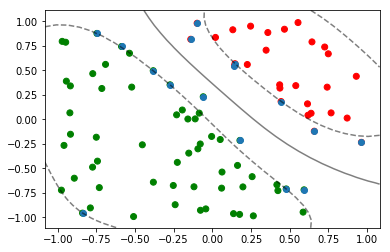

In [35]:
clf = SVC().fit(X, target)
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1])
plot_svc_decision_function(clf);

- Using a radial basis function the shape of the margin changes but there are no classification errors and the number of margin errors seems slighty lower in this case.
- The correctness of this model is not surprising because it is more powerful than the linear one